In [1]:
# 

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)

# Importing the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
df_train.head()

,Country,Year,Ladder,GDP,Support,Health,Freedom,Generosity,Corruption
0,Afghanistan,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686
1,Afghanistan,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035
2,Afghanistan,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766
3,Afghanistan,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109
4,Afghanistan,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620


In [3]:
print("Train: ", df_train.shape)
print("Test: ", df_test.shape)

Train:  (1627, 9)
Test:  (153, 9)


In [4]:
# Setting up arrays of predictors and target
X_train = df_train.iloc[:, 3:].values
y_train = df_train.iloc[:, 2].values
X_test = df_test.iloc[:, 3:].values
y_test = df_test.iloc[:, 2].values

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train.reshape(-1, 1))
y_train = np.ravel(y_train.reshape(1, -1))
y_test = sc_y.fit_transform(y_test.reshape(-1, 1))
y_test = np.ravel(y_test.reshape(1, -1))

In [6]:
1/(len(X_train[0])*X_train.var())

0.16666666666666666

In [7]:
# 
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.1, 1, 2, 4, 7, 10],
    #'gamma': [0.001, 0.01, 0.1, 0.167, 1],
    'epsilon': [0.1, 0.167, 0.2, 0.25, 0.3, 0.5]}
model = SVR(kernel='rbf', gamma='scale')
grid = GridSearchCV(model, params, verbose=4, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 2, 4, 7, 10],
                         'epsilon': [0.1, 0.167, 0.2, 0.25, 0.3, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

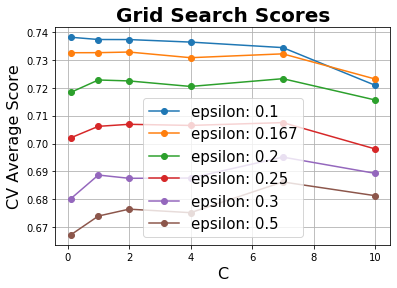

In [8]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    plt.savefig("grid_search_SVR_C_epsilon.png", dpi=450)
    
plot_grid_search(grid.cv_results_, params['C'], params['epsilon'], 'C', 'epsilon')

In [9]:
grid.best_score_

0.7380667667178955

In [10]:
grid.best_params_

{'C': 0.1, 'epsilon': 0.1}

In [11]:
regressor = SVR(**grid.best_params_)
#
#max_depth=6, n_estimators=200
regressor.fit(X_train, y_train);

In [12]:
print("Train: ", regressor.score(X_train, y_train))
print("Test: ", regressor.score(X_test, y_test))

Train:  0.7958361870538382
Test:  0.7718185755080393


In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.1, 1, 2, 4, 7, 10],
    'gamma': [0.001, 0.01, 0.1, 0.167, 1]}
    #'epsilon': [0.1, 0.167, 0.2, 0.3, 0.5]}
model = SVR(kernel='rbf')
grid = GridSearchCV(model, params, verbose=4, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 2, 4, 7, 10],
                         'gamma': [0.001, 0.01, 0.1, 0.167, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

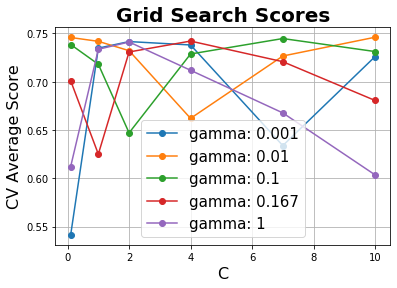

In [14]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    plt.savefig("grid_search_SVR_C_gamma.png", dpi=450)
    
plot_grid_search(grid.cv_results_, params['C'], params['gamma'], 'C', 'gamma')

In [15]:
grid.best_score_

0.7460120261064411

In [16]:
grid.best_params_

{'C': 2, 'gamma': 0.01}

In [17]:
regressor = SVR(**grid.best_params_)
#
#max_depth=6, n_estimators=200
regressor.fit(X_train, y_train);

In [18]:
print("Train: ", regressor.score(X_train, y_train))
print("Test: ", regressor.score(X_test, y_test))

Train:  0.7768356576533877
Test:  0.7602524065443054


In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
params = {
    #'C': [0.1, 1, 2, 4, 7, 10],
    'gamma': [0.001, 0.01, 0.1, 0.167, 1],
    'epsilon': [0.1, 0.167, 0.2, 0.3, 0.5]}
model = SVR(kernel='rbf', C=1)
grid = GridSearchCV(model, params, verbose=4, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 110 out of 125 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'epsilon': [0.1, 0.167, 0.2, 0.3, 0.5],
                         'gamma': [0.001, 0.01, 0.1, 0.167, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

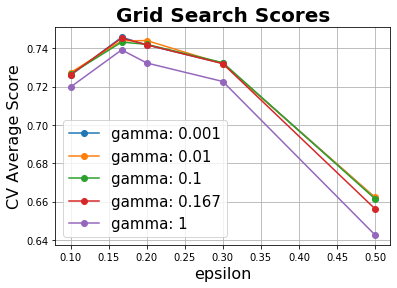

In [20]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    plt.savefig("grid_search_SVR_C_gamma.png", dpi=450)
    
plot_grid_search(grid.cv_results_, params['epsilon'], params['gamma'], 'epsilon', 'gamma')

In [21]:
grid.best_score_

0.7457523078983256

In [22]:
grid.best_params_

{'epsilon': 0.1, 'gamma': 0.01}

In [23]:
regressor = SVR(**grid.best_params_)
#
#max_depth=6, n_estimators=200
regressor.fit(X_train, y_train);

In [24]:
print("Train: ", regressor.score(X_train, y_train))
print("Test: ", regressor.score(X_test, y_test))

Train:  0.7734792447633919
Test:  0.7547573357312158


In [25]:
regressor = SVR(kernel='rbf', C=5, gamma=0.167, epsilon=0.0167)
#
#max_depth=6, n_estimators=200
regressor.fit(X_train, y_train);

print("Train: ", regressor.score(X_train, y_train))
print("Test: ", regressor.score(X_test, y_test))

Train:  0.8608413397960595
Test:  0.8121866659040067


In [26]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.5, 1, 1.5, 2, 2.5, 4],
    #'degree': [2, 3, 4, 5, 6],
    'gamma': [0.001, 0.01, 0.1, 0.167, 1],
    'epsilon': [0.1, 0.167, 0.2, 0.3, 0.5]}
model = SVR(kernel='linear')
grid = GridSearchCV(model, params, verbose=4, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 394 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 712 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   23.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.5, 1, 1.5, 2, 2.5, 4],
                         'epsilon': [0.1, 0.167, 0.2, 0.3, 0.5],
                         'gamma': [0.001, 0.01, 0.1, 0.167, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [27]:
grid.best_score_

0.7220655845795602

In [28]:
grid.best_params_

{'C': 0.5, 'epsilon': 0.5, 'gamma': 0.001}

In [12]:
from sklearn.svm import SVR

regressor = SVR(kernel='linear', C=1, gamma=0.167, epsilon=0.167)
#
#max_depth=6, n_estimators=200
regressor.fit(X_train, y_train);

print("Train: ", regressor.score(X_train, y_train))
print("Test: ", regressor.score(X_test, y_test))

Train:  0.7441989133563282
Test:  0.7247940348374284


In [17]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(regressor, prefit=True)
#model.fit(X_train, y_train)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)

In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.1, 1, 2, 4, 7, 10],
    'gamma': [0.001, 0.01, 0.1, 0.167, 1],
    'epsilon': [0.1, 0.167, 0.2, 0.3, 0.5]}
model = SVR(kernel='rbf')
grid = GridSearchCV(model, params, verbose=4, n_jobs=-1)
grid.fit(X_train_new, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   17.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 2, 4, 7, 10],
                         'epsilon': [0.1, 0.167, 0.2, 0.3, 0.5],
                         'gamma': [0.001, 0.01, 0.1, 0.167, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [20]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'epsilon': 0.3, 'gamma': 1}
0.7265428009397442


In [23]:
regressor = SVR(kernel='rbf', C=1, gamma=1, epsilon=0.3)
#
#max_depth=6, n_estimators=200
regressor.fit(X_train_new, y_train);

print("Train: ", regressor.score(X_train_new, y_train))
print("Test: ", regressor.score(X_test_new, y_test))

Train:  0.8072992114880485
Test:  0.7997063072716315
